# Repetition of basic vector and matrix bills in ptyhonie
## Row and column vector
We will use bills numpy` for bills, and this is drawing the module `pylab`. Import them:

In [2]:
import numpy as np
import pylab as py

Native type of variables in numpy are arrays or array.
 
Although they are multidimensional and can be used efficiently by indexing and extracting them, they are not matrices in the mathematical sense by default.

In order to cultivate algebra with their help, we must give them the shape :-). The `reshape` method is used for this.

To test the properties of these objects, please execute the following code:

In [3]:
x = np.array([1,2,3,4])
print(len(x), x.shape)
print('x: ',x)
print('Transpose x: ',x.T)

4 (4,)
x:  [1 2 3 4]
Transpose x:  [1 2 3 4]


Is array x and transposed array x different?

And now please execute the following code:

In [4]:
x = np.array([1,2,3,4]).reshape(4,1)
print(len(x), x.shape)
print('x: ',x)
print('Transpose x: ',x.T)

4 (4, 1)
x:  [[1]
 [2]
 [3]
 [4]]
Transpose x:  [[1 2 3 4]]


Please check the shape and transposition of the 2x2 matrix, e.g.
$A =
\left[
\begin{array}{cc}
1 & 2 \\
3 & 4
\end{array}
\right]
$

In [5]:
A = np.array([[1,2],[3,4]])
print(A)

[[1 2]
 [3 4]]


The operator `*` is used to multiply the matrix element by element, or to multiply the matrix by a scalar:

In [6]:
print(A*A)

[[ 1  4]
 [ 9 16]]


In [7]:
print(2*A)

[[2 4]
 [6 8]]


In [8]:
v = np.array([3])
print(v*A)

[[ 3  6]
 [ 9 12]]


To perform multiplication in the matrix sense the `np.dot` function is used:

In [9]:
print(np.dot(A,A))

[[ 7 10]
 [15 22]]


Analyze what the following commands do:

In [10]:
x = np.array([1,2,3,4]).reshape(4,1)
print(x)

[[1]
 [2]
 [3]
 [4]]


In [11]:
print(np.dot(x.T,x))

[[30]]


In [12]:
print(np.dot(x,x.T))

[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]
 [ 4  8 12 16]]


# Familiarization with linear regression
* We will create data that we will use later.
* Our test function has the following form: $ y = \theta_0 + \theta_1 x $
* `(X, Y)` is the training set.
First, we produce `x`:

In [23]:
ile = 10
x = np.linspace(0, 10,ile).reshape(ile, 1)
print(x)

[[  0.        ]
 [  1.11111111]
 [  2.22222222]
 [  3.33333333]
 [  4.44444444]
 [  5.55555556]
 [  6.66666667]
 [  7.77777778]
 [  8.88888889]
 [ 10.        ]]


For further matrix accounts, `X` is useful, in which the first column is the one-column, and the second is `x`:

In [120]:
X = np.ones((ile,2))
X[:,1] = x[:, 0]
print(X)

[[  1.           0.        ]
 [  1.           1.11111111]
 [  1.           2.22222222]
 [  1.           3.33333333]
 [  1.           4.44444444]
 [  1.           5.55555556]
 [  1.           6.66666667]
 [  1.           7.77777778]
 [  1.           8.88888889]
 [  1.          10.        ]]


We set the parameters for the simulation $ \ theta_0 = 1 $ and $ \ theta_1 = 3 $:

In [72]:
theta = np.array([1, 3]).reshape(2, 1) # theta must be a columned vector
print(theta)

[[1]
 [3]]


We produce: `y`

In [126]:
Y =  np.dot(X,theta) + 3*np.random.randn(ile,1)
print(Y)

[[ -0.97153671]
 [  6.82194603]
 [  6.72016988]
 [ 14.4964768 ]
 [ 10.55536474]
 [ 13.44099088]
 [ 13.11526219]
 [ 28.38953951]
 [ 25.60460166]
 [ 26.29176447]]


Let's see this data:

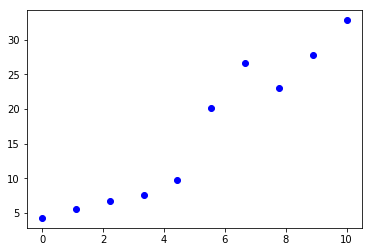

In [40]:
py.plot(X[:,1], Y,'bo')
py.show()

## The algorithm of normal equations
Please write a function that:
* on the input, takes the training set, implements the formula for optimal parameters based on [normal equations](http://brain.fuw.edu.pl/edu/index.php/Uczenie_maszynowe_i_sztuczne_sieci_neuronowe/Wykład_1#Minimalizacja_funkcji_ksztsztu).
* The function should return the theta parameters estimated.
* Please draw a line representing the hypothesis to the learning points diagram.
* as a reminder: the inverse of the matrix can be calculated in numpy with the function: <tt> numpy.linalg.inv </tt>

real parameters:  [[1 3]]
values estimated using normal equations:  [[ 1.24817257  2.63965708]]


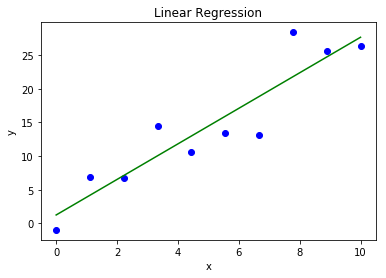

In [127]:
def licz_rownania_normalne(X,Y):
    xTx = np.dot(np.transpose(X), X)
    xTy = np.dot(np.transpose(X), Y)
    theta = np.dot(np.linalg.inv(xTx), xTy)
    return theta

theta_est = licz_rownania_normalne(X,Y)
print("real parameters: ", theta.T)
print("values estimated using normal equations: ", theta_est.T)
py.plot(X[:,1], Y,'bo')
y_reg = np.dot(X,theta_est) 
py.plot(X[:,1],y_reg,'g')
py.xlabel("x")
py.ylabel("y")
py.title(u"Linear Regression")
py.show()

## Stochastic gradient algorithm
Please write a function that finds theta optimal parameters by <tt>stochastic gradient algorithm</tt>. The function takes as arguments the training set, theta initial values and the learning rate (alpha).
At the output, the function should return the parameter values that were estimated.

As an illustration after each iteration, please draw a simple parameterized by the current parameter values.

prawdziwe wartości parametrów:  [[1 3]]
values estimated using the stochastic gradient algorithm:  [[ 1.81376068  3.08716349]]


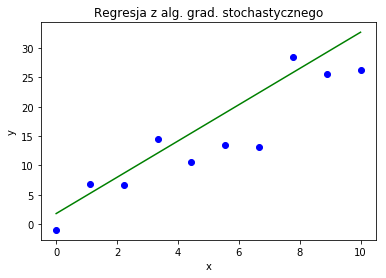

In [128]:
def licz_iteracyjnie_stoch(X,Y,theta0 = np.array([0,0]).reshape(2,1), alpha = 0.01):
    for i in range(2000):
        ind = np.random.randint(X.shape[0])
        # small x is the entry of a single example with an ind index
        x = X[ind, :]
        y = Y[ind, :]
        x = x.reshape(1,len(x))
        #print("test: ", np.dot(x, theta0))
        h_theta = np.dot(x, theta0)
        partValue = (h_theta - y) * x
        #if i == 0 : print(theta0)
        theta0 = theta0 - alpha * np.transpose(partValue)
    return theta0

theta_est = licz_iteracyjnie_stoch(X,Y)
print("prawdziwe wartości parametrów: ", theta.T)
print("values estimated using the stochastic gradient algorithm: ", theta_est.T)
py.plot(X[:,1], Y,'bo')
y_reg = np.dot(X,theta_est) 
py.plot(X[:,1],y_reg,'g')
py.xlabel("x")
py.ylabel("y")
py.title(u"Regresja z alg. grad. stochastycznego")
py.show()

## Algorithm cumulative summary
Please write a function that finds theta optimal parameters by <tt>batch gradient</tt> algorithms. The function takes as arguments the training set, theta initial values and the learning rate (alpha).
At the output, the function should return the parameter values that were estimated.

As an illustration after each iteration, please draw a simple parameterized by the current parameter values.

prawdziwe wartości parametrów:  [[1 3]]
wartości estymowane za pomocą algorytmu gradientowego zbiorczego:  [[ 1.24817257  2.63965708]]


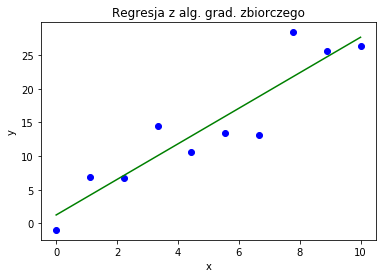

In [129]:
def licz_iteracyjnie_batch(X,Y,theta0 = np.array([0,0]).reshape(2,1), alpha = 0.005):
    delta = np.ones(len(theta0)).reshape(len(theta0),1)
    for i in range(2000):
        delta = np.zeros((len(theta0),1))
        for ind, x in enumerate(X):
            # small x is the entry of a single example
            x = x.reshape(1, len(x))
            delta += ( np.dot(x,theta0)- Y[ind])*x.T
        theta0 = theta0 - alpha * delta 
    return theta0

theta_est = licz_iteracyjnie_batch(X,Y)
print("prawdziwe wartości parametrów: ", theta.T)
print("wartości estymowane za pomocą algorytmu gradientowego zbiorczego: ", theta_est.T)
py.plot(X[:,1], Y,'bo')
y_reg = np.dot(X,theta_est) 
py.plot(X[:,1],y_reg,'g')
py.xlabel("x")
py.ylabel("y")
py.title(u"Regresja z alg. grad. zbiorczego")
py.show()

## Comparison of algorithms
* Please check the convergence of algorithms depending on the parameters of the convergence rate.
* Please check if the optimization algorithms are working correctly for data where the error is subject to other probability distributions than normal. e.g., homogeneous distribution or t 3 degrees of freedom.